In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib import rcParams
from matplotlib import colors
from helita.sim import rh15d
import os
import xarray as xr
from scipy.integrate.quadrature import cumtrapz
from scipy.interpolate import interp1d
import astropy.constants as const
from helita.utils.utilsmath import planck, voigt
rcParams['text.usetex'] = True
rcParams['text.latex.unicode'] = True
rcParams['font.family'] = 'serif'
import scipy.io
import h5py
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def airtovacuum(data,wvllimit = 199.9352):
    wvl = data.ray.wavelength
    b = xr.where(wvl > wvllimit,wvl*(1.0000834213e+0 + 2.406030e+6/(1.30e+10 - (1.0e+7 / wvl)**2) + 1.5997e+4/(3.89e+9 - (1.0e+7 / wvl)**2)),wvl)
    data.ray.wavelength.values = b
    data.ray.coords['wavelength'] = b
    return data

C=np.array([[83,188,208],[84,188,207],[86,189,206],[87,189,204],[89,190,203],[91,190,202],[92,191,201],[94,191,200],[95,191,198],[97,192,197],[99,192,196],[100,193,195],[102,193,194],[103,194,193],[105,194,191],[106,195,190],[108,195,189],[110,196,188],[111,196,187],[113,197,186],[114,197,184],[116,197,183],[118,198,182],[119,198,181],[121,199,180],[122,199,178],[124,200,177],[126,200,176],[127,201,175],[129,201,174],[130,202,173],[132,202,171],[133,203,170],[135,203,169],[137,203,168],[138,204,167],[140,204,166],[141,205,164],[143,205,163],[145,206,162],[146,206,161],[148,207,160],[149,207,158],[151,208,157],[153,208,156],[154,209,155],[156,209,154],[157,209,153],[159,210,151],[160,210,150],[162,211,149],[164,211,148],[165,212,147],[167,212,146],[168,213,144],[170,213,143],[172,214,142],[173,214,141],[175,214,140],[176,215,138],[178,215,137],[180,216,136],[181,216,135],[183,217,134],[184,217,133],[185,217,133],[186,217,133],[187,217,133],[189,217,133],[190,217,133],[191,216,133],[192,216,134],[193,216,134],[194,216,134],[195,216,134],[196,216,134],[197,216,134],[199,216,134],[200,215,134],[201,215,134],[202,215,134],[203,215,134],[204,215,134],[205,215,135],[206,215,135],[207,215,135],[208,214,135],[210,214,135],[211,214,135],[212,214,135],[213,214,135],[214,214,135],[215,214,135],[216,214,135],[217,213,135],[218,213,136],[219,213,136],[221,213,136],[222,213,136],[223,213,136],[224,213,136],[225,213,136],[226,213,136],[227,212,136],[228,212,136],[229,212,136],[231,212,136],[232,212,137],[233,212,137],[234,212,137],[235,212,137],[236,211,137],[237,211,137],[238,211,137],[239,211,137],[240,211,137],[242,211,137],[243,211,137],[244,211,138],[245,210,138],[246,210,138],[247,210,138],[248,210,138],[249,210,138],[250,210,138],[251,210,138],[253,210,138],[254,209,138],[254,209,138],[254,208,137],[254,207,137],[253,206,136],[253,205,135],[253,204,134],[252,203,134],[252,202,133],[252,201,132],[252,200,131],[251,199,131],[251,198,130],[251,197,129],[250,196,129],[250,196,128],[250,195,127],[250,194,126],[249,193,126],[249,192,125],[249,191,124],[249,190,123],[248,189,123],[248,188,122],[248,187,121],[247,186,121],[247,185,120],[247,184,119],[247,183,118],[246,182,118],[246,181,117],[246,180,116],[245,179,115],[245,178,115],[245,177,114],[245,176,113],[244,175,113],[244,174,112],[244,173,111],[243,173,110],[243,172,110],[243,171,109],[243,170,108],[242,169,107],[242,168,107],[242,167,106],[242,166,105],[241,165,105],[241,164,104],[241,163,103],[240,162,102],[240,161,102],[240,160,101],[240,159,100],[239,158,99],[239,157,99],[239,156,98],[238,155,97],[238,154,97],[238,153,96],[238,152,95],[237,151,94],[237,151,94],[237,150,93],[237,149,92],[236,147,91],[236,145,90],[236,144,89],[236,142,88],[236,140,86],[236,139,85],[236,137,84],[236,135,83],[236,133,82],[236,132,81],[236,130,79],[236,128,78],[236,127,77],[236,125,76],[236,123,75],[236,121,74],[236,120,72],[236,118,71],[236,116,70],[236,115,69],[236,113,68],[236,111,67],[236,109,65],[236,108,64],[236,106,63],[236,104,62],[235,103,61],[235,101,60],[235,99,58],[235,98,57],[235,96,56],[235,94,55],[235,92,54],[235,91,53],[235,89,52],[235,87,50],[235,86,49],[235,84,48],[235,82,47],[235,80,46],[235,79,45],[235,77,43],[235,75,42],[235,74,41],[235,72,40],[235,70,39],[235,68,38],[235,67,36],[235,65,35],[235,63,34],[235,62,33],[235,60,32],[235,58,31],[235,57,29],[234,55,28],[234,53,27],[234,51,26],[234,50,25],[234,48,24],[234,46,22],[234,45,21],[234,43,20],[234,41,19],[234,39,18]])
my_rainbow = colors.ListedColormap(C/255.0)



/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/yjzhu/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-macosx-10.9-x86_64.egg/helita/sim/rh15d.py:40: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  setattr(self, g, xr.open_dataset(infile, group=g, autoclose=True))
/Users/yjzhu/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-macosx-10.9-x86_64.egg/helita/sim/rh15d.py:53: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(fi

--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F11_d3_Ec85_v5_Mg/output/output_aux.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F11_d3_Ec85_v5_Mg/output/output_indata.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F11_d3_Ec85_v5_Mg/output/output_ray.hdf5 file.
done
done
done
done
done
done
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F11_d3_Ec150_v5_Mg/output/output_aux.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F11_d3_Ec150_v5_Mg/output/output_indata.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F11_d3_Ec150_v5_Mg/output/output_ray.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F11_d3_Ec200_v5_Mg/output/output_aux.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F11_d3_Ec200_v5_Mg/output/output_indata.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d

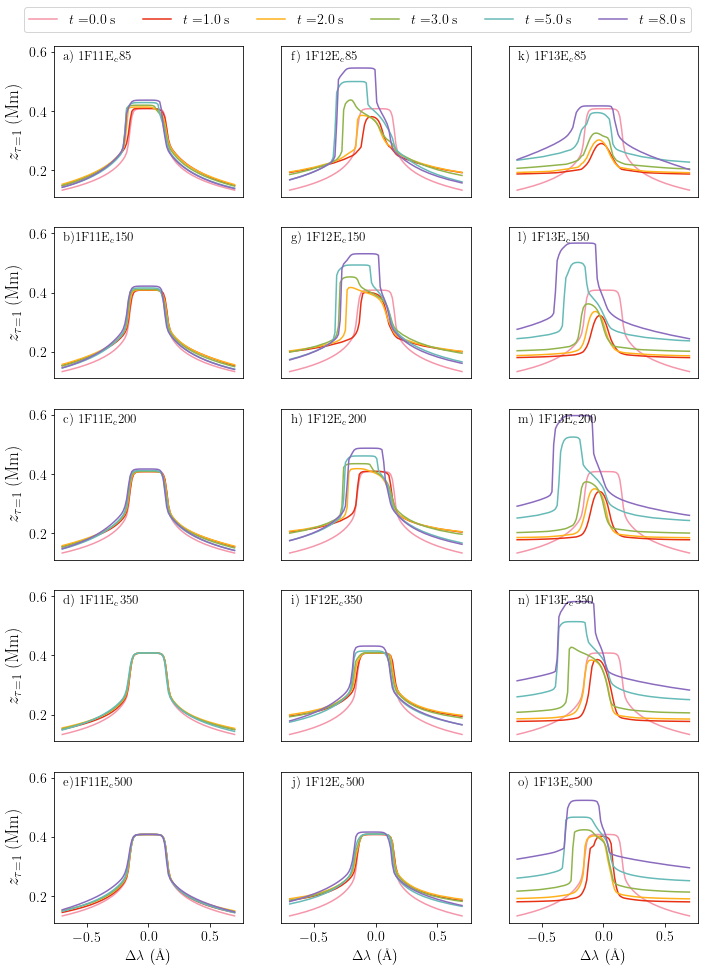

In [7]:
sta_wvl = 1.e7/35669.312
wvl_wing = 0.07
wvl_band = [sta_wvl - wvl_wing,sta_wvl + wvl_wing]
wvl_points = np.linspace(sta_wvl - wvl_wing,sta_wvl + wvl_wing,100)

B_Params = [('11','85'),('11','150'),('11','200'),('11','350'),('11','500'),
           ('12','85'),('12','150'),('12','200'),('12','350'),('12','500'),
           ('13','85'),('13','150'),('13','200'),('13','350'),('13','500'),]
panel = ['a) ','b)', 'c) ','d) ','e)',
        'f) ', 'g) ','h) ','i) ','j) ',
        'k) ', 'l) ','m) ', 'n) ', 'o) ']
colors = ['#F596AA','#E83015','#FFB11B','#90B44B','#66BAB7','#8A6BBE']
t_steps = [0,5,10,15,25,40]
labels = [r'$t=0.0\ \mathrm{s}$',r'$t=2.6\ \mathrm{s}$',r'$t=6.3\ \mathrm{s}$',r'$t=7.4\ \mathrm{s}$',r'$t=8.28\ \mathrm{s}$',r'$t=10.20\ \mathrm{s}$',
         r'$t=23.53\ \mathrm{s}$']
intensity_grid_label = r'$\mathrm{C\ II\ 1334}$'
leg = []
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)) = plt.subplots(5,3,figsize=(10,14))

intensity_grid = [ax1,ax4,ax7,ax10,ax13,ax2,ax5,ax8,ax11,ax14,ax3,ax6,ax9,ax12,ax15]

for intensity_ax_ in [ax2,ax3,ax5,ax6,ax8,ax9,ax11,ax12]:
    intensity_ax_.get_xaxis().set_visible(False)
    intensity_ax_.get_yaxis().set_visible(False)
    
for intensity_ax_ in [ax1,ax4,ax7,ax10]:
    intensity_ax_.get_xaxis().set_visible(False)

for intensity_ax_ in [ax14,ax15]:
    intensity_ax_.get_yaxis().set_visible(False)  
    
ax1.get_shared_x_axes().join(ax1, ax2)
ax1.get_shared_x_axes().join(ax1, ax3)

for intensity_ax_ in intensity_grid[1:]:
    ax1.get_shared_y_axes().join(ax1, intensity_ax_)

for ii,ax_ in enumerate(intensity_grid):
    atmos_filename = '/Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/Atmos/dMe/F'+B_Params[ii][0]+'_d3_Ec'+B_Params[ii][1]+'_tv15.hdf5'
    data_filename = '/Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F'+B_Params[ii][0]+'_d3_Ec'+B_Params[ii][1]+'_v5_Mg/output'
    if ii == 0:
        data_atmos = h5py.File(atmos_filename,'r')
        timet = data_atmos['timet'].value
        timet_c = [timet[step_c] for step_c in t_steps]
        timet_step = [r'$t = $'+"{:.1f}".format(timet_)+r' s' for timet_ in timet_c]
        
    data = rh15d.Rh15dout(data_filename)
    data = airtovacuum(data)
    flux = data.ray.tau_one_height.sel(y=0)/1.e6
    flux_band = flux.interp(wavelength = wvl_points)
    
    if ii !=3:
        for jj,step_ in enumerate(t_steps):
            if ii == 0:
                ln, = ax_.plot((flux_band.coords['wavelength']-sta_wvl)*10,flux_band[step_],color=colors[jj],label = timet_step[jj])
                leg.append(ln)
                print('done')
            else:
                ax_.plot((flux_band.coords['wavelength']-sta_wvl)*10,flux_band[step_],color=colors[jj])
    else:
        for jj,step_ in enumerate(t_steps[:-1]):
                ax_.plot((flux_band.coords['wavelength']-sta_wvl)*10,flux_band[step_],color=colors[jj])
    
    grid_title = panel[ii] + r'$\mathrm{1F' + B_Params[ii][0] + r'E_c' +B_Params[ii][1] +r'}$'
    ax_.set_title(grid_title,position=(0.05,0.85),loc='left',fontsize=13)
    ax_.tick_params(labelsize=14)
    
    
    #del im

    
for ax_ in [ax13,ax14,ax15]:
    ax_.set_xlabel(r'$\Delta \lambda \ \mathrm{\left(\AA\right)}$',fontsize = 14)

for ax_ in [ax1,ax4,ax7,ax10,ax13]:
    ax_.set_ylabel(r'$z_{\tau=1}$ (Mm)',fontsize = 18)

print(leg)
ax1.legend(leg,[leg_.get_label() for leg_ in leg],bbox_to_anchor=(1.4,1.2,2,.102),ncol=6,fontsize=14)  
plt.subplots_adjust(bottom = 0.08,left=0.08,right=0.975,top=0.95)
plt.savefig(fname = '../figs/dMe_MgIIh_tau1.eps', dpi = 300, format = 'eps')


/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/yjzhu/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-macosx-10.9-x86_64.egg/helita/sim/rh15d.py:40: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  setattr(self, g, xr.open_dataset(infile, group=g, autoclose=True))
/Users/yjzhu/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-macosx-10.9-x86_64.egg/helita/sim/rh15d.py:53: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(fi

--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F11_d3_Ec85_v5_Mg/output/output_aux.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F11_d3_Ec85_v5_Mg/output/output_indata.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F11_d3_Ec85_v5_Mg/output/output_ray.hdf5 file.
done
done
done
done
done
done
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F11_d3_Ec150_v5_Mg/output/output_aux.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F11_d3_Ec150_v5_Mg/output/output_indata.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F11_d3_Ec150_v5_Mg/output/output_ray.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F11_d3_Ec200_v5_Mg/output/output_aux.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F11_d3_Ec200_v5_Mg/output/output_indata.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d

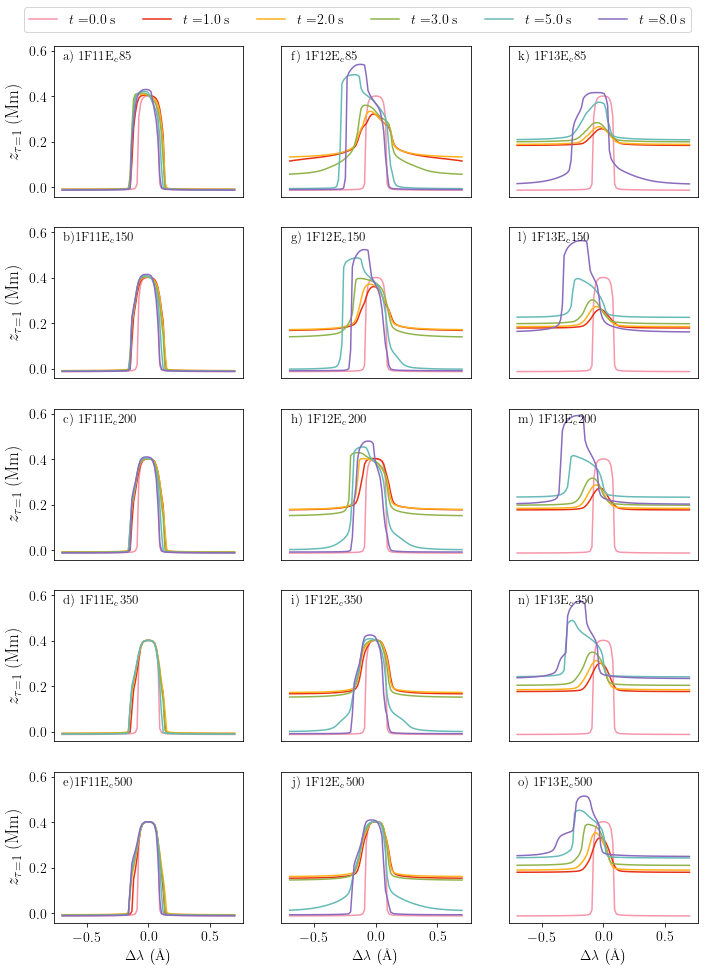

In [9]:
sta_wvl = 1.e7/(71491.062-35669.312)
wvl_wing = 0.07
wvl_band = [sta_wvl - wvl_wing,sta_wvl + wvl_wing]
wvl_points = np.linspace(sta_wvl - wvl_wing,sta_wvl + wvl_wing,100)

B_Params = [('11','85'),('11','150'),('11','200'),('11','350'),('11','500'),
           ('12','85'),('12','150'),('12','200'),('12','350'),('12','500'),
           ('13','85'),('13','150'),('13','200'),('13','350'),('13','500'),]
panel = ['a) ','b)', 'c) ','d) ','e)',
        'f) ', 'g) ','h) ','i) ','j) ',
        'k) ', 'l) ','m) ', 'n) ', 'o) ']
colors = ['#F596AA','#E83015','#FFB11B','#90B44B','#66BAB7','#8A6BBE']
t_steps = [0,5,10,15,25,40]
labels = [r'$t=0.0\ \mathrm{s}$',r'$t=2.6\ \mathrm{s}$',r'$t=6.3\ \mathrm{s}$',r'$t=7.4\ \mathrm{s}$',r'$t=8.28\ \mathrm{s}$',r'$t=10.20\ \mathrm{s}$',
         r'$t=23.53\ \mathrm{s}$']
intensity_grid_label = r'$\mathrm{C\ II\ 1334}$'
leg = []
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)) = plt.subplots(5,3,figsize=(10,14))

intensity_grid = [ax1,ax4,ax7,ax10,ax13,ax2,ax5,ax8,ax11,ax14,ax3,ax6,ax9,ax12,ax15]

for intensity_ax_ in [ax2,ax3,ax5,ax6,ax8,ax9,ax11,ax12]:
    intensity_ax_.get_xaxis().set_visible(False)
    intensity_ax_.get_yaxis().set_visible(False)
    
for intensity_ax_ in [ax1,ax4,ax7,ax10]:
    intensity_ax_.get_xaxis().set_visible(False)

for intensity_ax_ in [ax14,ax15]:
    intensity_ax_.get_yaxis().set_visible(False)  
    
ax1.get_shared_x_axes().join(ax1, ax2)
ax1.get_shared_x_axes().join(ax1, ax3)

for intensity_ax_ in intensity_grid[1:]:
    ax1.get_shared_y_axes().join(ax1, intensity_ax_)

for ii,ax_ in enumerate(intensity_grid):
    atmos_filename = '/Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/Atmos/dMe/F'+B_Params[ii][0]+'_d3_Ec'+B_Params[ii][1]+'_tv15.hdf5'
    data_filename = '/Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F'+B_Params[ii][0]+'_d3_Ec'+B_Params[ii][1]+'_v5_Mg/output'
    if ii == 0:
        data_atmos = h5py.File(atmos_filename,'r')
        timet = data_atmos['timet'].value
        timet_c = [timet[step_c] for step_c in t_steps]
        timet_step = [r'$t = $'+"{:.1f}".format(timet_)+r' s' for timet_ in timet_c]
        
    data = rh15d.Rh15dout(data_filename)
    data = airtovacuum(data)
    flux = data.ray.tau_one_height.sel(y=0)/1.e6
    flux_band = flux.interp(wavelength = wvl_points)
    
    if ii !=3:
        for jj,step_ in enumerate(t_steps):
            if ii == 0:
                ln, = ax_.plot((flux_band.coords['wavelength']-sta_wvl)*10,flux_band[step_],color=colors[jj],label = timet_step[jj])
                leg.append(ln)
                print('done')
            else:
                ax_.plot((flux_band.coords['wavelength']-sta_wvl)*10,flux_band[step_],color=colors[jj])
    else:
        for jj,step_ in enumerate(t_steps[:-1]):
                ax_.plot((flux_band.coords['wavelength']-sta_wvl)*10,flux_band[step_],color=colors[jj])
    
    grid_title = panel[ii] + r'$\mathrm{1F' + B_Params[ii][0] + r'E_c' +B_Params[ii][1] +r'}$'
    ax_.set_title(grid_title,position=(0.05,0.85),loc='left',fontsize=13)
    ax_.tick_params(labelsize=14)
    
    
    #del im

    
for ax_ in [ax13,ax14,ax15]:
    ax_.set_xlabel(r'$\Delta \lambda \ \mathrm{\left(\AA\right)}$',fontsize = 14)

for ax_ in [ax1,ax4,ax7,ax10,ax13]:
    ax_.set_ylabel(r'$z_{\tau=1}$ (Mm)',fontsize = 18)

print(leg)
ax1.legend(leg,[leg_.get_label() for leg_ in leg],bbox_to_anchor=(1.4,1.2,2,.102),ncol=6,fontsize=14)  
plt.subplots_adjust(bottom = 0.08,left=0.08,right=0.975,top=0.95)
plt.savefig(fname = '../figs/dMe_MgII2791_tau1.eps', dpi = 300, format = 'eps')
